# Identify Customer Segments

In this project, I applied unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Load Data

There are four files:

- `Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

In [3]:
# Load in the general demographics data.
general = pd.read_csv('Subset.csv', sep =';')

# Load in the feature summary file.
feat_info = pd.read_csv('Feature_Summary.csv',sep =';')

In [4]:
# print first five rows
general.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [5]:
# print the shape of data
general.shape

(891221, 85)

In [4]:
# from the info we can see some features contain many missing values
general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AGER_TYP               891221 non-null  int64  
 1   ALTERSKATEGORIE_GROB   891221 non-null  int64  
 2   ANREDE_KZ              891221 non-null  int64  
 3   CJT_GESAMTTYP          886367 non-null  float64
 4   FINANZ_MINIMALIST      891221 non-null  int64  
 5   FINANZ_SPARER          891221 non-null  int64  
 6   FINANZ_VORSORGER       891221 non-null  int64  
 7   FINANZ_ANLEGER         891221 non-null  int64  
 8   FINANZ_UNAUFFAELLIGER  891221 non-null  int64  
 9   FINANZ_HAUSBAUER       891221 non-null  int64  
 10  FINANZTYP              891221 non-null  int64  
 11  GEBURTSJAHR            891221 non-null  int64  
 12  GFK_URLAUBERTYP        886367 non-null  float64
 13  GREEN_AVANTGARDE       891221 non-null  int64  
 14  HEALTH_TYP             891221 non-nu

In [6]:
# understand features info
# we can see each feature recorded missing value differerntly
feat_info

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
...,...,...,...,...
80,PLZ8_HHZ,macrocell_plz8,ordinal,[-1]
81,PLZ8_GBZ,macrocell_plz8,ordinal,[-1]
82,ARBEIT,community,ordinal,"[-1,9]"
83,ORTSGR_KLS9,community,ordinal,"[-1,0]"



## 2 : Preprocessing

### 2.1: Assess Missing Data

#### 2.1.1: Convert Missing Value Codes to NaNs

In [7]:
# Identify missing or unknown data values and convert them to NaNs.


# create a function to clean data
# iterate through feature info dataframe
def clean_na(dataset, feature_info):
    for index, row in feature_info.iterrows():
        feature = row['attribute']
        missing_value=row['missing_or_unknown']
        # missing value already recorded as NaN
        if missing_value =='[]':
            continue;
        # missing values are read as string, we have to convert them to list
        missing_value = missing_value[1:-1]
        missing_value = missing_value.split(',')
        for i in missing_value:
            if i=='X'or i=='XX':
                dataset[feature]=dataset[feature].replace(i,np.nan)
            else:
                dataset[feature]=dataset[feature].replace(int(i),np.nan)
    return dataset


In [8]:
df = clean_na(general, feat_info)
df.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


#### 2.1.2: Assess Missing Data in Each Column

In [12]:
# Perform an assessment of how much missing data there is in each column of the dataset.
missing_num = df.isnull().sum().tolist()

(array([39., 40.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.]),
 array([     0. ,  88906.1, 177812.2, 266718.3, 355624.4, 444530.5,
        533436.6, 622342.7, 711248.8, 800154.9, 889061. ]),
 <a list of 10 Patch objects>)

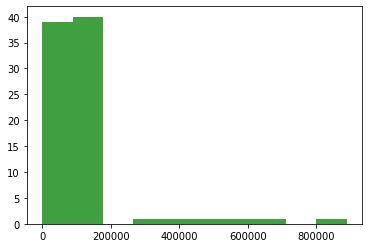

In [13]:
# Investigate patterns in the amount of missing data in each column.
plt.hist(missing_num, facecolor='g',alpha=0.75)

In [14]:
# Remove the outlier columns from the dataset
drop_col=[]
for col in df.columns:
    if df[col].isnull().sum()>200000:
        # keep record for future reference
        drop_col.append(col)
        print('Column name: '+ col +'  Missing Value: '+ str(df[col].isnull().sum()))
        df = df.drop(col,axis=1)

Column name: AGER_TYP  Missing Value: 685843
Column name: GEBURTSJAHR  Missing Value: 392318
Column name: TITEL_KZ  Missing Value: 889061
Column name: ALTER_HH  Missing Value: 310267
Column name: KK_KUNDENTYP  Missing Value: 584612
Column name: KBA05_BAUMAX  Missing Value: 476524


From the histogram we can see most columns have less than 200,000 missing values, so I took columns with more than 200,000 missing values as outlier and deleted them. Six columns were removed.

#### Step 2.1.3: Assess Missing Data in Each Row

In [16]:
# How much data is missing in each row of the dataset?
df['row_missing']=df.isnull().sum(axis=1)

(array([6.97109e+05, 7.76340e+04, 1.28010e+04, 9.53300e+03, 8.29000e+02,
        1.55000e+02, 1.40160e+04, 5.03100e+03, 2.80380e+04, 4.60750e+04]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <a list of 10 Patch objects>)

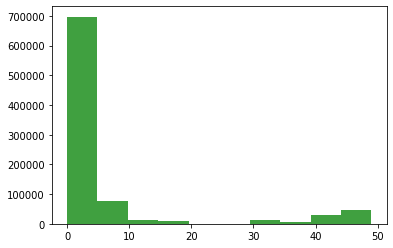

In [17]:
#plot the distribution of missing value in each row
plt.hist(df['row_missing'], facecolor='g',alpha=0.75)

In [18]:
# choose 20 as threshold and divide data
sub1 = df[df['row_missing']<=20]
sub1=sub1.drop('row_missing',axis=1)
sub1.shape

(797426, 79)

In [19]:
sub2 = df[df['row_missing']>20]
sub2=sub2.drop('row_missing',axis=1)
sub2.shape

(93795, 79)

In [20]:
# find columns with no or few missing values
# create dictionary recording number of missing value in each column
missing_col={}
for col in df.columns:
    missing_col[col]=df[col].isnull().sum()

In [21]:
# sort the dictionary by value
# get top five columns
from operator import itemgetter
sorted_col = sorted(missing_col.items(), key=itemgetter(1))
sorted_col[:5]

[('ANREDE_KZ', 0),
 ('FINANZ_MINIMALIST', 0),
 ('FINANZ_SPARER', 0),
 ('FINANZ_VORSORGER', 0),
 ('FINANZ_ANLEGER', 0)]

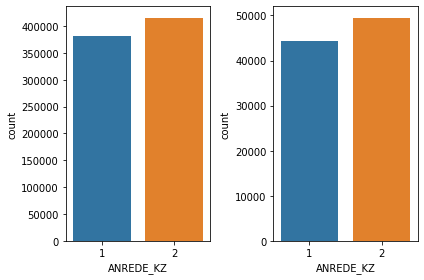

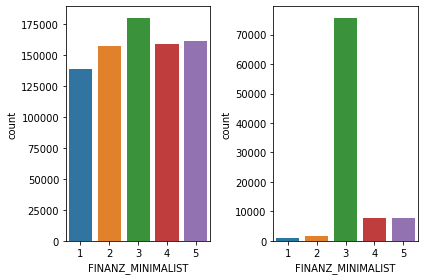

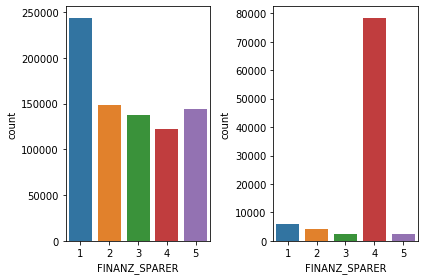

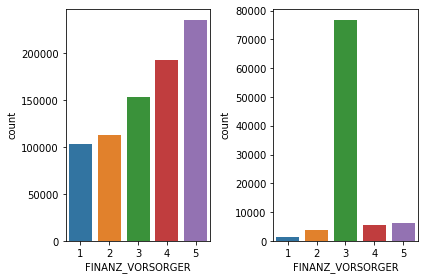

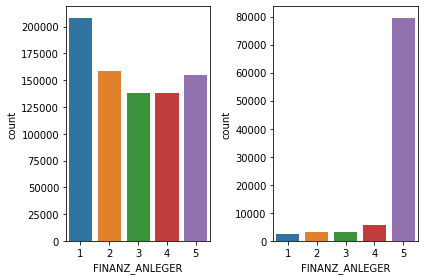

In [22]:
# Compare the distribution of values for five columns where there are
# no or few missing values, between the two subsets.
def dis_compare(col,df1,df2):
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    sns.countplot(df1[col], ax=ax1)
    sns.countplot(df2[col], ax=ax2)
    plt.tight_layout()

for item in sorted_col[:5]:
    dis_compare(item[0],sub1,sub2)

Almost 90% data has less than 20 missing values per row, and the left data has missing value ranging from 30 to 50 per row, so I use 20 as threshold and cut the data into 2 subsets. From the countplot, we can see that except 'ANREDE_KZ', the other four columns all shows difference between data with a lots of missing points and data with few ones.

### 2.2: Select and Re-Encode Features

In [21]:
# understand how many features are there of each data type?
feat_dict={}
for val in feat_info['type']:
    feat_dict[val]=feat_dict.get(val,0)+1
feat_dict

{'categorical': 21, 'ordinal': 49, 'numeric': 7, 'mixed': 7, 'interval': 1}

#### 2.2.1: Re-Encode Categorical Features

In [23]:
# create list to store categorical fetures needed to be re-encoded
cat_feat=[]
for attr in feat_info[feat_info['type']=='categorical']['attribute']:
    if attr in drop_col:
        continue
    if len(sub1[attr].unique())==2 and sub1[attr].dtype!='object':
        continue
    sub1[attr]=sub1[attr].astype('category')
    cat_feat.append(attr)
print(cat_feat)

['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'VERS_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']


In [24]:
# Re-encode categorical variables to be kept in the analysis.
df_cat=pd.get_dummies(sub1[cat_feat])

In [25]:
df_cat.head()

,CJT_GESAMTTYP_1.0,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_1,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,...,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
1,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [26]:
sub1=sub1.drop(cat_feat,axis=1)
sub1.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
1,1.0,2,1,5,2,5,4,5,0,3.0,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2,1,4,1,2,3,5,1,3.0,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2,4,2,5,2,1,2,0,2.0,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1,4,3,4,1,3,2,0,3.0,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,1.0,2,3,1,5,2,2,5,0,3.0,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0


From the feat-info table, we can see there are 21 categorical features in this dataframe. I have already dropped the features with many missing values, then I keep the binary features with numeric values. For the remaining categorical features, I turned them into dummy variables. To avoid accidentally make dummy variables on mixed type variables, I cut the dataframe into two parts and will combine them later. 

#### 2.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. 

In [28]:
# read data dictionary to understand data details
data_dict =open('Data_Dictionary.md','r')
data = data_dict.read()
print(data)

# Data Dictionary for Identify Customer Segments Data

## Introduction

The data for this project consist of two files:

- Udacity_AZDIAS_Subset.csv: demographics data for the general population of
      Germany; 891211 persons (rows) x 85 features (columns)
- Udacity_CUSTOMERS_Subset.csv: demographics data for customers of a mail-order
      company; 191652 persons (rows) x 85 features (columns)

The columns in the general demographics file and customers data file are the
same. This file documents the features that appear in the data files, sorted in
order of appearance. Sections of this file is based on the level of measurement
of each feature. The file "AZDIAS_Feature_Summary.csv" contains a summary of
feature attributes, including information level, data type, and codes for
missing or unknown values.

### Table of Contents

 1. Person-level features
 2. Household-level features
 3. Building-level features
 4. RR4 micro-cell features
 5. RR3 micro-cell features
 6. Postcode-level fe

In [42]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
# create interval-type decade
def map_decade(val):
    if val==1 or val==2:
        return 40
    elif val==3 or val==4:
        return 50
    elif 5<=val and val<=7:
        return 60
    elif val==8 or val==9:
        return 70
    elif val>=10 and val<=13:
        return 80
    elif val==14 or val==15:
        return 90
    
sub1['decade']= sub1["PRAEGENDE_JUGENDJAHRE"].apply (lambda val: map_decade(val))
sub1['decade'].head()

1    90.0
2    90.0
3    70.0
4    70.0
5    50.0
Name: decade, dtype: float64

In [43]:
# create binary variable for movement
def map_movement(val):
    if val in [1,3,5,8,10,12,14]:
        return 1
    if val in [2,4,6,7,9,11,13,15]:
        return 0
sub1['movement'] = sub1["PRAEGENDE_JUGENDJAHRE"].apply (lambda val: map_movement(val))
sub1['movement'].head()

1    1.0
2    0.0
3    1.0
4    1.0
5    1.0
Name: movement, dtype: float64

In [44]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
def map_wealth(val):
    for i in str(val)[0]:
        if i =='1':
            return 1
        elif i =='2':
            return 2
        elif i=='3':
            return 3
        elif i=='4':
            return 4
        elif i=='5':
            return 5

def map_life(val):
    for i in str(val)[1]:
        if i =='1':
            return 1
        elif i =='2':
            return 2
        elif i=='3':
            return 3
        elif i=='4':
            return 4
        elif i=='5':
            return 5

# create wealth variable
sub1['wealth'] = sub1['CAMEO_INTL_2015'].apply (lambda val: map_wealth(val))            
sub1['wealth'].head()

1    5.0
2    2.0
3    1.0
4    4.0
5    5.0
Name: wealth, dtype: float64

In [45]:
# create life stage variable
sub1['life_stage'] = sub1['CAMEO_INTL_2015'].apply (lambda val: map_life(val))            
sub1['life_stage'].head()

1    1.0
2    4.0
3    2.0
4    3.0
5    4.0
Name: life_stage, dtype: float64

In [46]:
# drop original mixed type columns
sub1=sub1.drop(["PRAEGENDE_JUGENDJAHRE",'CAMEO_INTL_2015'],axis=1)
sub1.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,decade,movement,wealth,life_stage
1,1.0,2,1,5,2,5,4,5,0,3.0,...,1.0,5.0,4.0,3.0,5.0,4.0,90.0,1.0,5.0,1.0
2,3.0,2,1,4,1,2,3,5,1,3.0,...,1.0,4.0,4.0,3.0,5.0,2.0,90.0,0.0,2.0,4.0
3,4.0,2,4,2,5,2,1,2,0,2.0,...,1.0,3.0,4.0,2.0,3.0,3.0,70.0,1.0,1.0,2.0
4,3.0,1,4,3,4,1,3,2,0,3.0,...,2.0,3.0,3.0,4.0,6.0,5.0,70.0,1.0,4.0,3.0
5,1.0,2,3,1,5,2,2,5,0,3.0,...,1.0,5.0,5.0,2.0,3.0,3.0,50.0,1.0,5.0,4.0


In [34]:
# look at other mixed type variables
for index,row in feat_info.iterrows():
    if row['type']=='mixed':
        print (row['attribute'])

LP_LEBENSPHASE_FEIN
LP_LEBENSPHASE_GROB
PRAEGENDE_JUGENDJAHRE
WOHNLAGE
CAMEO_INTL_2015
KBA05_BAUMAX
PLZ8_BAUMAX


In [47]:
# deal with remaining mixed features
# drop selected features
sub1=sub1.drop(["LP_LEBENSPHASE_FEIN",'LP_LEBENSPHASE_GROB'],axis=1)
sub1.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,decade,movement,wealth,life_stage
1,1.0,2,1,5,2,5,4,5,0,3.0,...,1.0,5.0,4.0,3.0,5.0,4.0,90.0,1.0,5.0,1.0
2,3.0,2,1,4,1,2,3,5,1,3.0,...,1.0,4.0,4.0,3.0,5.0,2.0,90.0,0.0,2.0,4.0
3,4.0,2,4,2,5,2,1,2,0,2.0,...,1.0,3.0,4.0,2.0,3.0,3.0,70.0,1.0,1.0,2.0
4,3.0,1,4,3,4,1,3,2,0,3.0,...,2.0,3.0,3.0,4.0,6.0,5.0,70.0,1.0,4.0,3.0
5,1.0,2,3,1,5,2,2,5,0,3.0,...,1.0,5.0,5.0,2.0,3.0,3.0,50.0,1.0,5.0,4.0


In [48]:
# engineer selected features
sub1['neighbor_qual'] = sub1['WOHNLAGE'].replace([7,8], np.nan)
sub1['rural'] = pd.cut(sub1['WOHNLAGE'], [1,6,9], False, [0,1])

sub1['familyhome_num'] = sub1['PLZ8_BAUMAX'].replace(5, np.nan)
sub1['business'] = pd.cut(sub1['PLZ8_BAUMAX'], [1,5,6], False, [0,1])

sub1.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,ORTSGR_KLS9,RELAT_AB,decade,movement,wealth,life_stage,neighbor_qual,rural,familyhome_num,business
1,1.0,2,1,5,2,5,4,5,0,3.0,...,5.0,4.0,90.0,1.0,5.0,1.0,4.0,0,1.0,0
2,3.0,2,1,4,1,2,3,5,1,3.0,...,5.0,2.0,90.0,0.0,2.0,4.0,2.0,0,1.0,0
3,4.0,2,4,2,5,2,1,2,0,2.0,...,3.0,3.0,70.0,1.0,1.0,2.0,NaN,1,1.0,0
4,3.0,1,4,3,4,1,3,2,0,3.0,...,6.0,5.0,70.0,1.0,4.0,3.0,3.0,0,2.0,0
5,1.0,2,3,1,5,2,2,5,0,3.0,...,3.0,3.0,50.0,1.0,5.0,4.0,NaN,1,1.0,0


In [51]:
sub1=sub1.drop(["WOHNLAGE",'PLZ8_BAUMAX'],axis=1)
sub1.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,ORTSGR_KLS9,RELAT_AB,decade,movement,wealth,life_stage,neighbor_qual,rural,familyhome_num,business
1,1.0,2,1,5,2,5,4,5,0,3.0,...,5.0,4.0,90.0,1.0,5.0,1.0,4.0,0,1.0,0
2,3.0,2,1,4,1,2,3,5,1,3.0,...,5.0,2.0,90.0,0.0,2.0,4.0,2.0,0,1.0,0
3,4.0,2,4,2,5,2,1,2,0,2.0,...,3.0,3.0,70.0,1.0,1.0,2.0,NaN,1,1.0,0
4,3.0,1,4,3,4,1,3,2,0,3.0,...,6.0,5.0,70.0,1.0,4.0,3.0,3.0,0,2.0,0
5,1.0,2,3,1,5,2,2,5,0,3.0,...,3.0,3.0,50.0,1.0,5.0,4.0,NaN,1,1.0,0


I created new columns by mapping engineered features using lamda. After engineering two mixed-type variables--PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015, I took a look at remaining mixed type features.

LP_LEBENSPHASE_FEIN and LP_LEBENSPHASE_GROB have many values,which makes it hard to re-engineer them. Meanwhile they are also similar to other features, so I decided to remove them. WOHNLAGE has reasonable number of values, so I kept it. KBA05_BAUMAX and PLZ8_BAUMAX basicly measure the same thing, KBA05_BAUMAX is already dropped due to large number of missing value, so I kept PLZ8_BAUMAX. 

#### Step 2.2.3: Complete Feature Selection

In [29]:
#combine dataframe with encoded features and remaining features
df_merge = pd.concat([sub1,df_cat],axis=1)
df_merge.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
1,1.0,2,1,5,2,5,4,5,0,3.0,...,0,1,0,0,0,0,0,0,0,0
2,3.0,2,1,4,1,2,3,5,1,3.0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,2,4,2,5,2,1,2,0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,1,4,3,4,1,3,2,0,3.0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,2,3,1,5,2,2,5,0,3.0,...,0,0,0,1,0,0,0,0,0,0


### Step 2.3: Create a Cleaning Function

In [30]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # convert missing value codes into NaNs, ...
    df = clean_na(df,feat_info)
    

    # drop selected columns
    df = df.drop(drop_col,axis=1)
    
    # count missing value for each row
    df['row_missing']=df.isnull().sum(axis=1)
    # drop selected rows
    df = df[df['row_missing']<=20]
    df=df.drop('row_missing',axis=1)
    
    # select, re-encode, and engineer column values.
    
    # change categorical feature data type to 'categorical'
    for attr in feat_info[feat_info['type']=='categorical']['attribute']:
        if attr in drop_col:
            continue
        if len(df[attr].unique())==2 and df[attr].dtype!='object':
            continue
        df[attr]=df[attr].astype('category')
        
    # re-encoded categorical deatures
    df_encode=pd.get_dummies(df[cat_feat])
    df=df.drop(cat_feat,axis=1)
    
    # engineer mixed-value features
    df['decade']= df["PRAEGENDE_JUGENDJAHRE"].apply (lambda val: map_decade(val))
    df['movement'] = df["PRAEGENDE_JUGENDJAHRE"].apply (lambda val: map_movement(val))
    df['wealth'] = df['CAMEO_INTL_2015'].apply (lambda val: map_wealth(val)) 
    df['life_stage'] = df['CAMEO_INTL_2015'].apply (lambda val: map_life(val))
    df['neighbor_qual'] = df['WOHNLAGE'].replace([7,8], np.nan)
    df['rural'] = pd.cut(df['WOHNLAGE'], [1,6,9], False, [0,1])
    df['familyhome_num'] = df['PLZ8_BAUMAX'].replace(5, np.nan)
    df['business'] = pd.cut(df['PLZ8_BAUMAX'], [1,5,6], False, [0,1])
    
    # drop original features
    df=df.drop(["PRAEGENDE_JUGENDJAHRE",'CAMEO_INTL_2015',"WOHNLAGE",'PLZ8_BAUMAX',
                "LP_LEBENSPHASE_FEIN",'LP_LEBENSPHASE_GROB'],axis=1)
    
    # Return the cleaned dataframe.
    df = pd.concat([df,df_encode],axis=1)
    
    return df  

## Step 3: Feature Transformation

### Step 3.1: Apply Feature Scaling

Before applying dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. 

In [32]:
# deal with remaining missing data
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
df_final = imp.fit_transform(df_merge)

In [60]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_final= ss.fit_transform(df_final)

In [61]:
df_final=pd.DataFrame(df_final, columns = df_merge.columns)
df_final.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
0,-1.766334,0.958071,-1.494609,1.538200,-1.040726,1.466448,0.959677,1.338816,-0.530567,1.010368,...,-0.076412,3.769529,-0.209171,-0.201058,-0.150091,-0.162592,-0.189578,-0.179852,-0.192844,-0.089743
1,0.200589,0.958071,-1.494609,0.864824,-1.766955,-0.570799,0.244962,1.338816,1.884775,1.010368,...,-0.076412,-0.265285,-0.209171,-0.201058,-0.150091,-0.162592,-0.189578,-0.179852,-0.192844,-0.089743
2,1.184051,0.958071,0.683150,-0.481928,1.137960,-0.570799,-1.184467,-0.792034,-0.530567,-0.311674,...,-0.076412,-0.265285,-0.209171,-0.201058,-0.150091,-0.162592,-0.189578,-0.179852,-0.192844,-0.089743
3,0.200589,-1.043765,0.683150,0.191448,0.411731,-1.249881,0.244962,-0.792034,-0.530567,1.010368,...,-0.076412,-0.265285,-0.209171,-0.201058,-0.150091,-0.162592,-0.189578,-0.179852,-0.192844,-0.089743
4,-1.766334,0.958071,-0.042770,-1.155304,1.137960,-0.570799,-0.469752,1.338816,-0.530567,1.010368,...,-0.076412,-0.265285,-0.209171,4.973684,-0.150091,-0.162592,-0.189578,-0.179852,-0.192844,-0.089743


### 3.2: Dimensionality Reduction

In [62]:
# Apply PCA to the data.
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(df_final)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

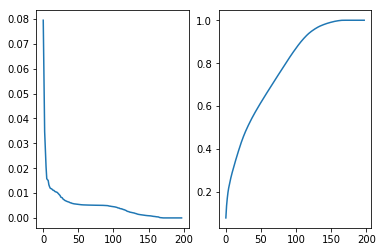

In [63]:
# Investigate the variance accounted for by each principal component.
fig, (ax1,ax2) = plt.subplots(ncols=2)
ax1.plot(pca.explained_variance_ratio_)
ax2.plot(pca.explained_variance_ratio_.cumsum())

In [64]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca=PCA(n_components=100)
pca.fit(df_final)
df_final = pca.transform(df_final)

From the plot we can see, at 50 components we can explain over 60% variance, and at 100 components we can retain almost 90% variance, so I decided to choose 100 as the number of principal components.

### 3.3: Interpret Principal Components

In [69]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
def pca_feature(pca,i):
    weights = pca.components_[i].tolist()
    features = df_merge.columns.tolist()
    dic = dict(zip(features,weights))
    sort_dic = sorted(dic.items(), key=itemgetter(1),reverse=True)
    return sort_dic

In [70]:
component0 = pca_feature(pca,0)
print(component0[:5])
print(component0[-5:])

[('LP_STATUS_GROB_1.0', 0.19311756797077637), ('PLZ8_ANTG3', 0.1828450935505662), ('wealth', 0.18233448223091248), ('HH_EINKOMMEN_SCORE', 0.1811567819183849), ('PLZ8_ANTG4', 0.17754733996969496)]
[('KBA05_ANTG1', -0.17755806436445065), ('KBA05_GBZ', -0.1790404493258994), ('PLZ8_ANTG1', -0.18396740810084272), ('FINANZ_MINIMALIST', -0.18453030481042093), ('MOBI_REGIO', -0.18514957804917767)]


In [71]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
component1 = pca_feature(pca,1)
print(component1[:5])
print(component1[-5:])

[('ALTERSKATEGORIE_GROB', 0.2350217217455454), ('FINANZ_VORSORGER', 0.22103605785669042), ('ZABEOTYP_3', 0.19921449326234666), ('SEMIO_ERL', 0.18026325912690078), ('SEMIO_LUST', 0.1641501236466682)]
[('SEMIO_TRADV', -0.20932467156681428), ('SEMIO_REL', -0.2172481581876308), ('FINANZ_UNAUFFAELLIGER', -0.21769838666677918), ('FINANZ_SPARER', -0.2309583563923274), ('decade', -0.23299387438180574)]


In [72]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
component2 = pca_feature(pca,2)
print(component2[:5])
print(component2[-5:])

[('SEMIO_VERT', 0.31618745124247183), ('SEMIO_FAM', 0.2575017636032111), ('SEMIO_SOZ', 0.25522259497105343), ('SEMIO_KULT', 0.24914517180953644), ('FINANZTYP_5', 0.13605724544298148)]
[('SEMIO_ERL', -0.20782196184714635), ('SEMIO_KRIT', -0.26525052669747673), ('SEMIO_DOM', -0.27719690979992345), ('SEMIO_KAEM', -0.3101295446731189), ('ANREDE_KZ', -0.3410194581600868)]


From detail investigation of top three components, we can find that their top weights all comes from different features, which allows them to explain large variance of the features. 

The first component is about social status,finacial income and movement pattern. Income and movement pattern seems to have negetive correlation, indicating increase in income will lead to decrease in movement pattern features, which means higher movement pattern.

The second one is mostly about people's age and financial status. It increase with age. Age and decade are negatively correlated, which makes sense. It also shows, when age increases, the money-save intention will increase.

The third component is about gender and personality. We can see the level of dreamful affinity is negatively realted to gender, indicating men would have less dreamful or family affinity compared to woman.

## Step 4: Clustering

### Step 4.1: Apply Clustering to General Population

In [73]:
from sklearn.cluster import KMeans
scores= []
for i in range(2,20):
    # run k-means clustering on the data and...
    kmeans = KMeans(n_clusters=i)
    model = kmeans.fit(df_final)
    
   # compute the average within-cluster distances.
    score = np.abs(model.score(df_final))

    scores.append(score)
    print(score)

126756003.81
122356668.761
119336651.365
116867494.516
115439328.662
113914151.96
112653078.762
111705590.581
110621630.683
109977862.274
109353635.112
108343903.668
107491833.484
106854887.522
106447982.069
105436421.052
105147462.998
104647476.236


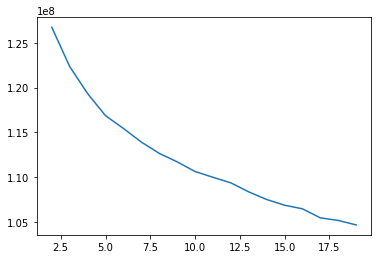

In [74]:
# Investigate the change in within-cluster distance across number of clusters.
n = [i for i in range(2,20)]
plt.plot(n,scores)

In [75]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15)
model = kmeans.fit(df_final)
general_results = model.predict(df_final)

From the print results and plot we can see that around 15 the decrease become slower, so I choose 15 as the number of clusters

### Step 4.2: Apply All Steps to the Customer Data

In [83]:
# Load in the customer demographics data.
customers = pd.read_csv('CUSTOMERS_Subset.csv', sep =';')
cus_df = clean_data(customers)
cus_df.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
0,4.0,1,5,1,5,1,2,2,1,1.0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,2,5,1,5,1,4,4,1,2.0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,1,5,1,5,2,1,2,0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,1,3,1,4,4,5,2,0,3.0,...,0,0,0,0,0,0,0,0,0,0
5,3.0,1,5,1,5,1,2,3,1,3.0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# make sure customer data has same number of column
missing_cols = set(df_merge.columns) - set(cus_df.columns)
missing_cols

{'GEBAEUDETYP_5.0'}

In [78]:
cus_df['GEBAEUDETYP_5.0']=0

In [79]:
# make column order the same as general population
cus_df=cus_df[df_merge.columns]
cus_df.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
0,4.0,1,5,1,5,1,2,2,1,1.0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,2,5,1,5,1,4,4,1,2.0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,1,5,1,5,2,1,2,0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,1,3,1,4,4,5,2,0,3.0,...,0,0,0,0,0,0,0,0,0,0
5,3.0,1,5,1,5,1,2,3,1,3.0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

# deal with missing value
cus_final =imp.transform(cus_df)
# feature scaling
cus_final =ss.transform(cus_final)
cus_final=pd.DataFrame(cus_final, columns = cus_df.columns)
cus_final.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
0,1.184051,-1.043765,1.409069,-1.155304,1.137960,-1.249881,-0.469752,-0.792034,1.884775,-1.633717,...,-0.076412,-0.265285,-0.209171,-0.201058,-0.150091,-0.162592,-0.189578,-0.179852,-0.192844,-0.089743
1,1.184051,0.958071,1.409069,-1.155304,1.137960,-1.249881,0.959677,0.628533,1.884775,-0.311674,...,-0.076412,-0.265285,-0.209171,-0.201058,-0.150091,-0.162592,-0.189578,-0.179852,-0.192844,-0.089743
2,1.184051,-1.043765,1.409069,-1.155304,1.137960,-0.570799,-1.184467,-0.792034,-0.530567,-0.311674,...,-0.076412,-0.265285,-0.209171,-0.201058,-0.150091,-0.162592,-0.189578,-0.179852,-0.192844,-0.089743
3,0.200589,-1.043765,-0.042770,-1.155304,0.411731,0.787366,1.674391,-0.792034,-0.530567,1.010368,...,-0.076412,-0.265285,-0.209171,-0.201058,-0.150091,-0.162592,-0.189578,-0.179852,-0.192844,-0.089743
4,0.200589,-1.043765,1.409069,-1.155304,1.137960,-1.249881,-0.469752,-0.081750,1.884775,1.010368,...,-0.076412,-0.265285,-0.209171,-0.201058,-0.150091,-0.162592,-0.189578,-0.179852,-0.192844,-0.089743


In [81]:
# predict center for customer data
cus = pca.transform(cus_final)
cus_result = model.predict(cus)
cus_result[:10]

array([13, 13,  4, 11,  9, 13, 13, 12,  2, 13], dtype=int32)

### Step 4.3: Compare Customer Data to Demographics Data

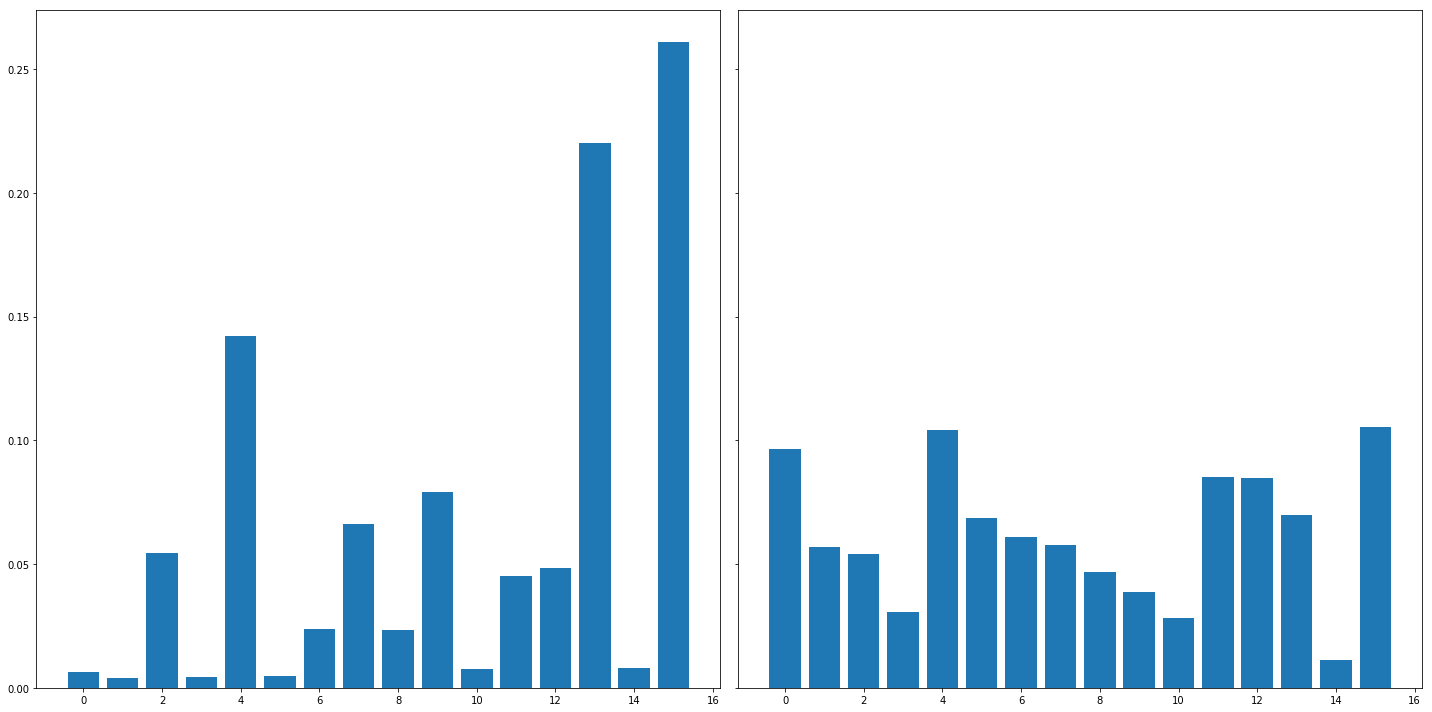

In [97]:
### Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

#num of data with many missing value in general population
general_missing = sub2.shape[0]
label, general_counts = np.unique(general_results, return_counts=True)
general_counts=general_counts.tolist()
general_counts.append(general_missing)
general_ratio = [i/azdias.shape[0] for i in general_counts]


# num of data with many missing value in customer
cus_missing = customers.shape[0]-cus_final.shape[0]
label, cus_counts = np.unique(cus_result, return_counts=True)
cus_counts=cus_counts.tolist()
cus_counts.append(cus_missing)
cus_ratio = [i/customers.shape[0] for i in cus_counts]

cluster = [i for i in range(16)]

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20, 10),sharey=True)
ax1.bar(cluster,cus_ratio)
ax2.bar(cluster,general_ratio)
plt.tight_layout()

In [93]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

# we can see that cluster 4,9,13 and popularion with many missing value are overrepresented in customer data.

# find the cluster center for cluster 13
centroid = model.cluster_centers_[13]
comp_dic={}
for i in range(100):
    comp_dic[i]=centroid[i]
sort_comp = sorted(comp_dic.items(), key=itemgetter(1))

# get top components
print(sort_comp[:3])
print(sort_comp[-3:])

[(0, -4.66527940302477), (7, -1.129815755289068), (8, -0.96753393914446084)]
[(2, 1.1270598553431088), (1, 2.3392337964678123), (3, 3.0333764381081929)]


In [95]:
# look at top component 0
component0 = pca_feature(pca,0)
print(component0[:3])
print(component0[-3:])

[('LP_STATUS_GROB_1.0', 0.19311756797077637), ('PLZ8_ANTG3', 0.1828450935505662), ('wealth', 0.18233448223091248)]
[('PLZ8_ANTG1', -0.18396740810084272), ('FINANZ_MINIMALIST', -0.18453030481042093), ('MOBI_REGIO', -0.18514957804917767)]


In [96]:
# look at original feature
original_feature = pca.inverse_transform(centroid)
original_feature = ss.inverse_transform(original_feature)
original_feature=pd.DataFrame([original_feature],columns=df_merge.columns)
original_feature[['LP_STATUS_GROB_1.0','PLZ8_ANTG3','wealth','PLZ8_ANTG1','MOBI_REGIO','FINANZ_MINIMALIST']]

# from the original value we can infer that this cluster represents people who are not low-income family,
# have high share of family homes. They also have low movement patterns and low financial interest

,LP_STATUS_GROB_1.0,PLZ8_ANTG3,wealth,PLZ8_ANTG1,MOBI_REGIO,FINANZ_MINIMALIST
0,0.062579,1.150746,2.023047,2.840638,4.288043,4.664787


In [98]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

# cluster 0,1,3,5 are underrepresented in customer data

# find cluster center for cluster 0
centroid = model.cluster_centers_[0]
comp_dic={}
for i in range(100):
    comp_dic[i]=centroid[i]
sort_comp = sorted(comp_dic.items(), key=itemgetter(1))

# get top components
print(sort_comp[:3])
print(sort_comp[-3:])

[(2, -2.3918742223932732), (1, -2.2261880599240724), (22, -0.53324836994515779)]
[(9, 0.56585032616963393), (3, 0.87238049881213142), (0, 4.8822107144667148)]


In [103]:
# look at original feature of component 0
original_feature = pca.inverse_transform(centroid)
original_feature = ss.inverse_transform(original_feature)
original_feature=pd.DataFrame([original_feature],columns=df_merge.columns)
original_feature[['LP_STATUS_GROB_1.0','PLZ8_ANTG3','wealth','PLZ8_ANTG1','MOBI_REGIO','FINANZ_MINIMALIST']]

# from the results, we can infer that this cluster represent population with low income, have relativly low share of
# family homes, high movement pattern and high financial interest.

,LP_STATUS_GROB_1.0,PLZ8_ANTG3,wealth,PLZ8_ANTG1,MOBI_REGIO,FINANZ_MINIMALIST
0,0.942553,2.281005,4.287973,1.605493,1.859784,1.103453


From the cluster results, we can see that income plays a important role in clusters. High income people are over-represented, which means they are relatively popular with the company, while unpopular with low income ones